# USO ETF Price Prediction with PCA and Regression

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import seaborn as sns
import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

In [4]:
# USO_ETF

In [5]:
df_final = pd.read_csv("/Users/katerina/Documents/Ironhack/USO_ETF/Ready Datasets/USO_ETF.csv")

In [6]:
df_final

,Date,XOM_Open,XOM_Close,XOM_High,XOM_Low,XOM_Adj_Close,XOM_Volume,BZ_Open,BZ_Close,BZ_High,...,USDI_Price,USDI_Open,USDI_High,USDI_Low,USO_Open,USO_Close,USO_High,USO_Low,USO_Adj_Close,USO_Volume
0,2013-03-11,89.01,89.16,89.55,88.54,58.3023,12454800,110.51,110.22,110.66,...,82.57,82.78,82.83,82.52,262.88,264.32,265.20,261.60,264.32,249738
1,2013-03-12,89.45,89.16,89.91,89.01,58.3023,11470000,110.13,109.65,111.18,...,82.58,82.66,82.79,82.41,267.68,266.08,268.80,265.76,266.08,424188
2,2013-03-13,89.02,89.26,89.50,88.83,58.3677,10539900,109.71,108.52,109.82,...,82.89,82.60,83.06,82.33,268.00,265.52,268.48,264.24,265.52,422175
3,2013-03-14,89.41,89.83,89.91,89.41,58.7404,13775500,108.60,109.42,109.94,...,82.61,82.90,83.17,82.43,266.08,267.36,267.84,265.84,267.36,262925
4,2013-03-15,89.20,89.37,89.61,88.79,58.4397,29240100,109.37,109.82,110.52,...,82.13,82.54,82.61,82.05,268.88,268.80,269.20,267.36,268.80,311300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,2022-09-14,96.19,97.67,98.56,96.15,96.1501,22655700,93.49,94.10,95.81,...,109.60,109.83,109.93,109.28,72.72,72.73,73.72,72.25,72.73,2594400
2397,2022-09-15,96.22,94.83,96.54,94.05,93.3543,21092300,94.43,90.84,91.63,...,109.80,109.60,109.92,109.42,71.09,69.76,71.15,69.34,69.76,3898100
2398,2022-09-16,95.07,93.21,95.34,92.00,91.7596,37874700,90.65,91.35,92.64,...,109.64,109.80,110.26,109.48,70.33,69.90,70.81,69.44,69.90,3384500
2399,2022-09-19,91.01,93.20,93.49,91.00,91.7497,15342100,91.65,92.00,92.58,...,109.54,109.55,110.18,109.49,67.62,70.05,70.27,67.49,70.05,2863900


In [7]:
df_final.dtypes

Date              object
XOM_Open         float64
XOM_Close        float64
XOM_High         float64
XOM_Low          float64
                  ...   
USO_Close        float64
USO_High         float64
USO_Low          float64
USO_Adj_Close    float64
USO_Volume         int64
Length: 64, dtype: object

In [8]:
df_final['Date'] = pd.to_datetime(df_final['Date'])
df_final.dtypes

Date             datetime64[ns]
XOM_Open                float64
XOM_Close               float64
XOM_High                float64
XOM_Low                 float64
                      ...      
USO_Close               float64
USO_High                float64
USO_Low                 float64
USO_Adj_Close           float64
USO_Volume                int64
Length: 64, dtype: object

In [ ]:
df_final= pd.to_datetime(df_final['Date'])
df_final.dtypes

In [9]:
df_final.index=df_final.Date
uso = df_final[['Date', 'USO_Adj_Close']].copy()

In [10]:
uso=uso.drop(["Date"], axis=1)


In [11]:
uso

,USO_Adj_Close
Date,
2013-03-11,264.32
2013-03-12,266.08
2013-03-13,265.52
2013-03-14,267.36
2013-03-15,268.80
...,...
2022-09-14,72.73
2022-09-15,69.76
2022-09-16,69.90


In [12]:
uso = df_final[['Date', 'USO_Adj_Close']].copy()
uso['Date'] = pd.to_datetime(uso['Date'])

In [13]:
uso.dtypes

Date             datetime64[ns]
USO_Adj_Close           float64
dtype: object

In [14]:
uso.columns

Index(['Date', 'USO_Adj_Close'], dtype='object')

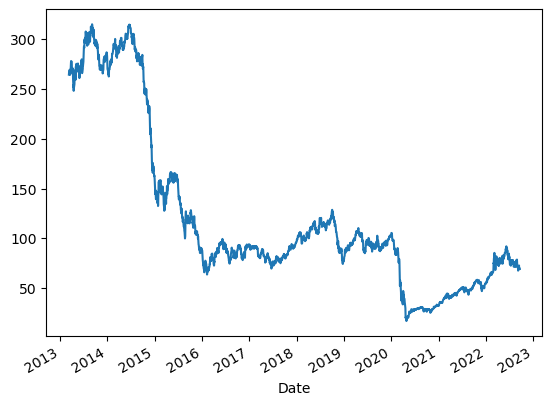

In [15]:
uso['USO_Adj_Close'].plot()

plt.show()

In [16]:
uso.index

DatetimeIndex(['2013-03-11', '2013-03-12', '2013-03-13', '2013-03-14',
               '2013-03-15', '2013-03-18', '2013-03-19', '2013-03-20',
               '2013-03-21', '2013-03-22',
               ...
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12',
               '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
               '2022-09-19', '2022-09-20'],
              dtype='datetime64[ns]', name='Date', length=2401, freq=None)

In [20]:
train_data = uso["USO_Adj_Close"].loc[:'2021-01-01'] 
test_data = uso["USO_Adj_Close"].loc['2021-01-01':]
test_data.shape

(432,)

/Users/katerina/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/katerina/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/katerina/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


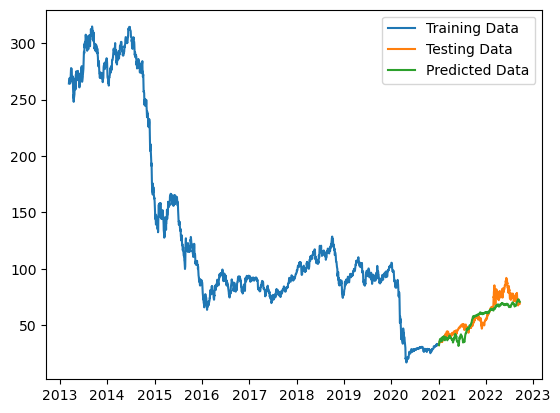

In [25]:
#AutoRegression

from statsmodels.tsa.api import AutoReg 

# Split the data into training and testing sets
train_data = uso["USO_Adj_Close"].loc[:'2021-01-01'] 
test_data = uso["USO_Adj_Close"].loc['2021-01-01':]

# Fit an autoregressive model with lag 365
model = AutoReg(train_data, lags=365)
result = model.fit()

# Predict the USO ETF prices for the next 21 months 
pred = result.predict(start=len(train_data), end=len(train_data)+431)
#print(result.summary)

pred.index = test_data.index

# Plot the actual and predicted USO ETF prices
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Testing Data')
plt.plot(pred.index, pred.values, label='Predicted Data')
plt.legend()
plt.show()